![](logoUdelS.png)

<div style="text-align: center">

## Doctorado en Sistemas Computacionales

### Seminario de Sistemas de Información para la Toma de decisiones

## Asesor:
### Dr. Gandhi Samuel Hernández

</div>

## INTEGRANTES
* PEREZ ESPARZA EDEL
* RODRIGUEZ RIVAS JOSE GABRIEL
* RODRIGUEZ ZUÑIGA MARCO ANTONIO  
</br>

<div style="text-align: center">
    
## ACTIVIDAD DE LA SEMANA 3
### Análisis de Datos

## DATASET  COVID19-MX
### https://www.kaggle.com/lalish99/covid19-mx

### Procedencia
https://www.gob.mx/salud/documentos/coronavirus-covid-19-comunicado-tecnico-diario-238449

### Última actualización
### 2020-06-10

</div>

## Variables del dataset
Los conjuntos de datos contienen las siguientes variables:

| Variable      | Descripcion |
| ------------- | ---------------------------------------------- |
| RESULTADO     | **1 =**  SARS-CoV-2, **2 =** No positivo SARS-CoV-2, **3=** Resultado pendiente |
| TIPO_PACIENTE | **1 =** AMBULATORIO, **2 =** HOSPITALIZADO **99 =**  NO ESPECIFICADO     |
| SEXO          | **1 =** MUJER, **2 =** HOMBRE, **99 =** NO ESPECIFICADO      |
| NACIONALIDAD  | **1 =** MEXICANA, **2 =** EXTRANJERA, **99 =** NO ESPECIFICADO       |
| ORIGEN        | **1 =** USMER, **2 =** FUERA DE USMER, **99 =** NO ESPECIFICADO |

Ademas existen las siguientes variables relacionadas con el padecimiento de una enfermedad

UCI, INTUBADO, NEUMONIA, DIABETES, EPOC, ASMA, INMUSUPR, HIPERTENSION, CARDIOVASCULAR,
OBESIDAD, RENAL_CRONICA, TABAQUISMO, OTRA_CON
y pueden tener estos valores

| Variable      | Descripcion |
| ------------- | ---------------------------------------------- |
| 1   |  SI              |
| 2   |  NO              |
| 97  |  NO APLICA       |
| 98  |  SE IGNORA       |
| 99  |  NO ESPECIFICADO |





In [1]:
# Cargar las librerías necesarias
import pandas as pd
import numpy as np

In [2]:
# Cargar el dataframe y mostrar las primeras 5 filas
df_general = pd.read_csv('covid-19_general_MX.csv')
df_general.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,INMUSUPR,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,0,4,9,2,9,2,2020-04-16,2020-04-06,2020-04-22,2,...,2,2,2,2,1,2,2,99,1,2
1,1,4,28,1,28,1,2020-04-30,2020-04-27,9999-99-99,97,...,2,2,2,2,2,2,2,99,1,97
2,2,4,9,2,15,1,2020-05-08,2020-05-05,9999-99-99,97,...,2,2,2,2,2,2,2,99,1,97
3,3,4,8,1,8,2,2020-05-06,2020-04-28,2020-05-14,2,...,2,1,2,2,1,2,1,99,1,2
4,4,3,25,2,25,2,2020-04-22,2020-04-12,2020-05-01,2,...,2,1,2,2,2,2,2,2,1,2


## Preparar los datos para el modelo de árbol de decisiones

Utilizaremos **scikit-learn para crear árboles de decisiones**. El modelo del árbol de decisiones que utilizaremos solo puede administrar **datos numéricos**. 


In [3]:
# Renombramos la columna  Unnamed: 0 como ID
df_general.rename(columns = { 'Unnamed: 0': 'ID'}, inplace = True )
df_general.head(5)

,ID,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,INMUSUPR,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,0,4,9,2,9,2,2020-04-16,2020-04-06,2020-04-22,2,...,2,2,2,2,1,2,2,99,1,2
1,1,4,28,1,28,1,2020-04-30,2020-04-27,9999-99-99,97,...,2,2,2,2,2,2,2,99,1,97
2,2,4,9,2,15,1,2020-05-08,2020-05-05,9999-99-99,97,...,2,2,2,2,2,2,2,99,1,97
3,3,4,8,1,8,2,2020-05-06,2020-04-28,2020-05-14,2,...,2,1,2,2,1,2,1,99,1,2
4,4,3,25,2,25,2,2020-04-22,2020-04-12,2020-05-01,2,...,2,1,2,2,2,2,2,2,1,2


In [4]:
# Elimninar columna  Unnamed: 0
# df_general.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [5]:
# Obtener el número de renglones (observaciones) y columnas (variables)
df_general.shape

(357055, 26)

In [6]:
# verificar si existen valores nulos en alguna variable
df_general.isnull().sum()

ID                0
SECTOR            0
ENTIDAD_UM        0
SEXO              0
ENTIDAD_RES       0
TIPO_PACIENTE     0
FECHA_INGRESO     0
FECHA_SINTOMAS    0
FECHA_DEF         0
INTUBADO          0
NEUMONIA          0
EDAD              0
NACIONALIDAD      0
DIABETES          0
EPOC              0
ASMA              0
INMUSUPR          0
HIPERTENSION      0
OTRA_CON          0
CARDIOVASCULAR    0
OBESIDAD          0
RENAL_CRONICA     0
TABAQUISMO        0
OTRO_CASO         0
RESULTADO         0
UCI               0
dtype: int64

In [7]:
#Desplegar nombres de columnas (variables)
print(list(df_general))

['ID', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_CON', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO', 'UCI']


In [8]:
# Creamos una nueva columna donde inicialmente todos estan vivos
# 1 = SI
# 2 = NO
df_general["SOBREVIVIO"] = 1

# De acuerdo al dataset, los que tienen fecha 9999-99-99 estan vivos
# Verificamos en la columna FECHA_DEF la fecha de defuncion para saber quien fallecio pero que tambien sea 
# positivo al covid puesto que podria ser otro el motivo del fallecimiento
df_general.loc[(df_general['FECHA_DEF'] != '9999-99-99') & (df_general['RESULTADO'] == 1) , 'SOBREVIVIO'] = 2

In [9]:
df_general.head()

,ID,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,SOBREVIVIO
0,0,4,9,2,9,2,2020-04-16,2020-04-06,2020-04-22,2,...,2,2,2,1,2,2,99,1,2,2
1,1,4,28,1,28,1,2020-04-30,2020-04-27,9999-99-99,97,...,2,2,2,2,2,2,99,1,97,1
2,2,4,9,2,15,1,2020-05-08,2020-05-05,9999-99-99,97,...,2,2,2,2,2,2,99,1,97,1
3,3,4,8,1,8,2,2020-05-06,2020-04-28,2020-05-14,2,...,1,2,2,1,2,1,99,1,2,2
4,4,3,25,2,25,2,2020-04-22,2020-04-12,2020-05-01,2,...,1,2,2,2,2,2,2,1,2,2


In [10]:
# Verificamos en los primeros 10 registros la nueva columna y sus valores
df_general.loc[: , ['FECHA_DEF', 'SOBREVIVIO', 'RESULTADO']].head(10)

,FECHA_DEF,SOBREVIVIO,RESULTADO
0,2020-04-22,2,1
1,9999-99-99,1,1
2,9999-99-99,1,1
3,2020-05-14,2,1
4,2020-05-01,2,1
5,9999-99-99,1,1
6,9999-99-99,1,1
7,9999-99-99,1,1
8,9999-99-99,1,1
9,9999-99-99,1,1


## Parte 1: Crear el arreglo de variables predictoras que será la entrada para el modelo.

Creamos una lista de las columnas a partir de los datos que deseamos que el clasificador utilice como variables de entrada y luego creamos un arreglo con el nombre de la columna de esa variable. La variable X_input contiene los valores para todas las funciones que utilizará el modelo para deducir cómo hacer las clasificaciones. Una vez que el modelo esté entrenado, utilizaremos esta variable para asignar estas etiquetas al conjunto de datos de prueba


In [57]:
# Variables predictoras   
predictors = ['SEXO',  'INTUBADO', 'NEUMONIA', 'EDAD', 'DIABETES', 'EPOC', 'ASMA', 
           'INMUSUPR', 'HIPERTENSION',  'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA',
           'TABAQUISMO', 'UCI', 'RESULTADO']

## Parte 2: Dividir el dataset en un conjunto de entrenamiento y un conjunto de prueba

Importaremos desde **sklearn.model_selection el método train_test_split().** 
1. Este método dividirá automáticamente el conjunto de datos completo y devolverá un total de cuatro arreglos numpy, dos para las características (prueba y validación) y dos para
las etiquetas (prueba y validación). 
2. Un parámetro del método especifica la proporción de observaciones que se utilizarán para la prueba y el entrenamiento. 

train_test_split(input_X, target_y, test_size=0.4, random_state=0)

El 30 % de los datos se utilizará para pruebas. 

Otra opcion es crear 2 nuevos dataframes a partir de una nueva columna, esta opcion permite simplififcar la comprobacion de lo que existe en el dataset con respecto a la prediccion haciendo uso de la funcion crosstab

In [58]:
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. 

X_input = df_general[list(predictors)].values
y_target = df_general["SOBREVIVIO"].values

# generar las cuatro matrices de datos de prueba y entrenamiento 
# con el método train_test_split ()

X2_train, X2_test, y2_train, y2_test = train_test_split(X_input, y_target, test_size=0.30, random_state=0)

In [59]:
# Agregamos otra columna para establecer aleatoriamente cual es para entrenamiento y cuales para testing

df_general["is_train"] = np.random.uniform(0,1, len(df_general)) <= 0.70

In [60]:
train, test = df_general[df_general["is_train"]==True] , df_general[df_general["is_train"]==False]

In [61]:
# Verificar número de observaciones y variables del dataset de entrenamiento y de prueba

print("Conjunto de Entrenamiento =", train.shape, "Conjunto de Prueba =", test.shape)

Conjunto de Entrenamiento = (250201, 28) Conjunto de Prueba = (106854, 28)


# Parte 2: Entrenar y calificar el modelo del árbol de decisiones.

## a) Crear un arreglo con la variable que será el objetivo del modelo.

El propósito del modelo es **clasificar** a los pacientes como **sobrevivientes** o como **víctimas fatales**. El conjunto de datos identifica sobrevivientes y víctimas fatales.

El modelo deducirá qué valores de entrada tienen más probabilidad de pertenecer a las víctimas fatales y a los sobrevivientes. Luego, se podrá utilizar dicha información para clasificar pacientes de un conjunto de datos único de prueba.

In [62]:
# En el dataset:  1 = Sobrevive, 2 = fallece
# Servira para que en el clasificador ponga la etiqueta en vez del código

clasif = ['SOBREVIVE', 'NO SOBREVIVE']

 ## b)  Crear un árbol de desición
 
 
1. Importar el módulo del árbol de decisiones desde la **biblioteca de aprendizaje automático sklearn. **
2. Crear el objeto clasificador **decision_tree** 
3. A continuación, utilizamos el **método fit()** del objeto clasificador **con la variables X_input e y_target** como parámetros para entrenar el modelo.
4. Ver intro arboles de desicion https://scikit-learn.org/stable/modules/tree.html 
5.   Ver Sintaxis del clasificador  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text

decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
decision_tree = decision_tree.fit(train[predictors], train['SOBREVIVIO'])

#  Crear un informe de texto que muestre las reglas del árbol de decisión.
r = export_text(decision_tree, feature_names=predictors, show_weights=True)
print(r)

|--- RESULTADO <= 1.50
|   |--- UCI <= 49.50
|   |   |--- INTUBADO <= 1.50
|   |   |   |--- NEUMONIA <= 1.50
|   |   |   |   |--- weights: [819.00, 1868.00] class: 2
|   |   |   |--- NEUMONIA >  1.50
|   |   |   |   |--- weights: [56.00, 35.00] class: 1
|   |   |--- INTUBADO >  1.50
|   |   |   |--- EDAD <= 54.50
|   |   |   |   |--- weights: [10609.00, 2259.00] class: 1
|   |   |   |--- EDAD >  54.50
|   |   |   |   |--- weights: [8331.00, 4963.00] class: 1
|   |--- UCI >  49.50
|   |   |--- NEUMONIA <= 1.50
|   |   |   |--- EDAD <= 50.50
|   |   |   |   |--- weights: [1644.00, 151.00] class: 1
|   |   |   |--- EDAD >  50.50
|   |   |   |   |--- weights: [922.00, 485.00] class: 1
|   |   |--- NEUMONIA >  1.50
|   |   |   |--- EDAD <= 55.50
|   |   |   |   |--- weights: [46292.00, 171.00] class: 1
|   |   |   |--- EDAD >  55.50
|   |   |   |   |--- weights: [8402.00, 282.00] class: 1
|--- RESULTADO >  1.50
|   |--- weights: [162912.00, 0.00] class: 1



### Interpretacion: 
De acuerdo al árbol de decision generado por el modelo las condicioes mas influyentes para que una persona no sobreviva al COVID-10, es que la persona este en la Unidad de Cuidados Intensivos, que este intubado y que le de neumonía.  

## c) Evaluar el modelo.

Utilizamos el **método score()** del objeto del árbol de decisiones para mostrar la precisión del porcentaje de las asignaciones realizadas por el clasificador. 
Este método considera las variables de entrada y salida como argumentos.

In [64]:
decision_tree.score(train[predictors], train['SOBREVIVIO'])

# Este valor de calificación indica que las calificaciones realizadas por el modelo 
# deberían ser correctas aproximadamente el 96 % de las veces.

0.963369450961427

## d) Modo gráfico
* Importe el módulo del árbol de decisiones desde la **biblioteca de aprendizaje automático sklearn.**
* Crear el objeto clasificador decision_tree
* Utilizar el método fit() del objeto clasificador con la variables X_input e y_target como parámetros para entrenar el modelo.
* Usaremos las mismas caracteristicas que en el paso anterior 

#### Instalar paquetes
1. pip install scikit-learn 
2. pip install graphviz

conda install python-graphviz

Descargar graphviz https://graphviz.gitlab.io/_pages/Download/Download_windows.html

Agregar a variables de entorno la ubicacion del ejecutable


In [69]:
#importar el modulo tree de la libreria sklearn 
from sklearn import tree
 
#crear clf_train como un objeto clasificador del árbol de decisión
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)

# entrenar el modelo usando el método fit () del objeto del árbol de decisión.
# Suministre el método con la variable de entrada X_input y la variable de destino y_target

clf_train = clf_train.fit(train[predictors], train['SOBREVIVIO'])

In [70]:
import graphviz 
# API REFERENCE   graphviz
# https://graphviz.readthedocs.io/en/stable/api.html#graph

dot_data = tree.export_graphviz(clf_train, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("COVID-MX",format="png") 

'COVID-MX.png'

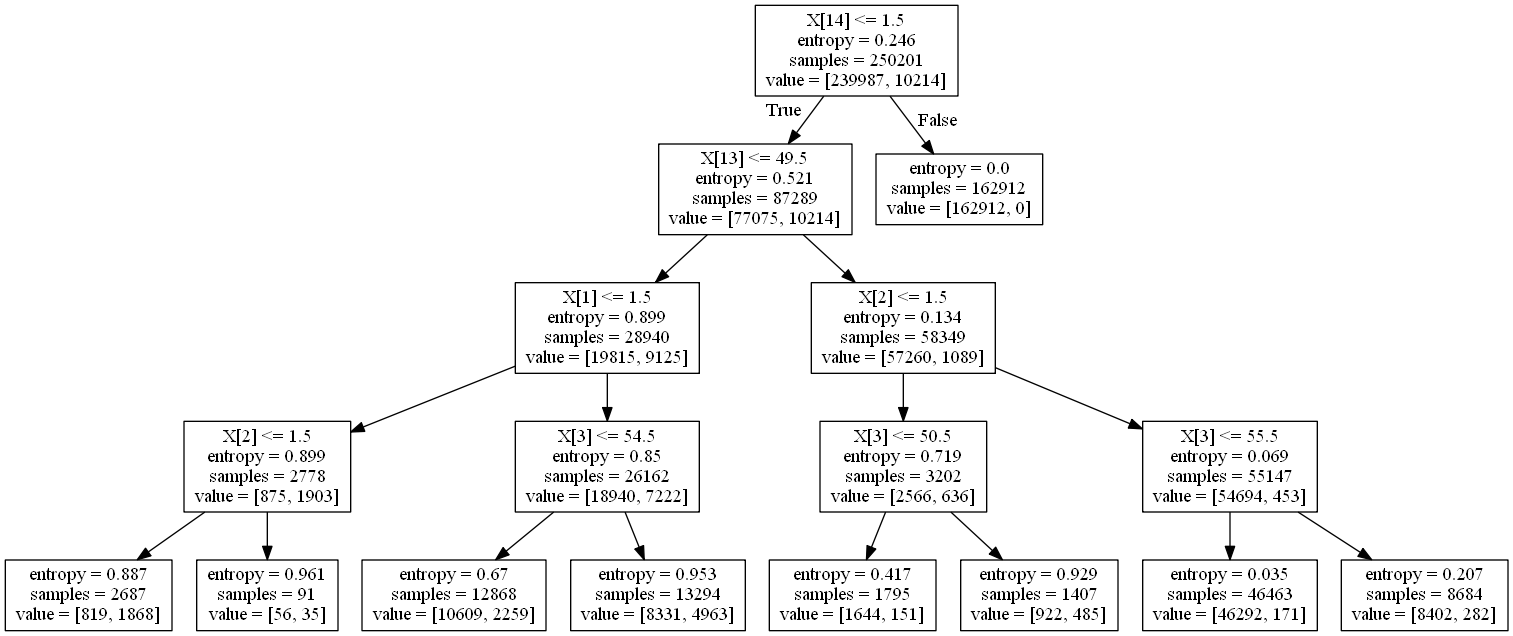

In [71]:
from IPython.display import Image

fig = Image(filename=('COVID-MX.png'))
fig

### Mejorar la apariencia


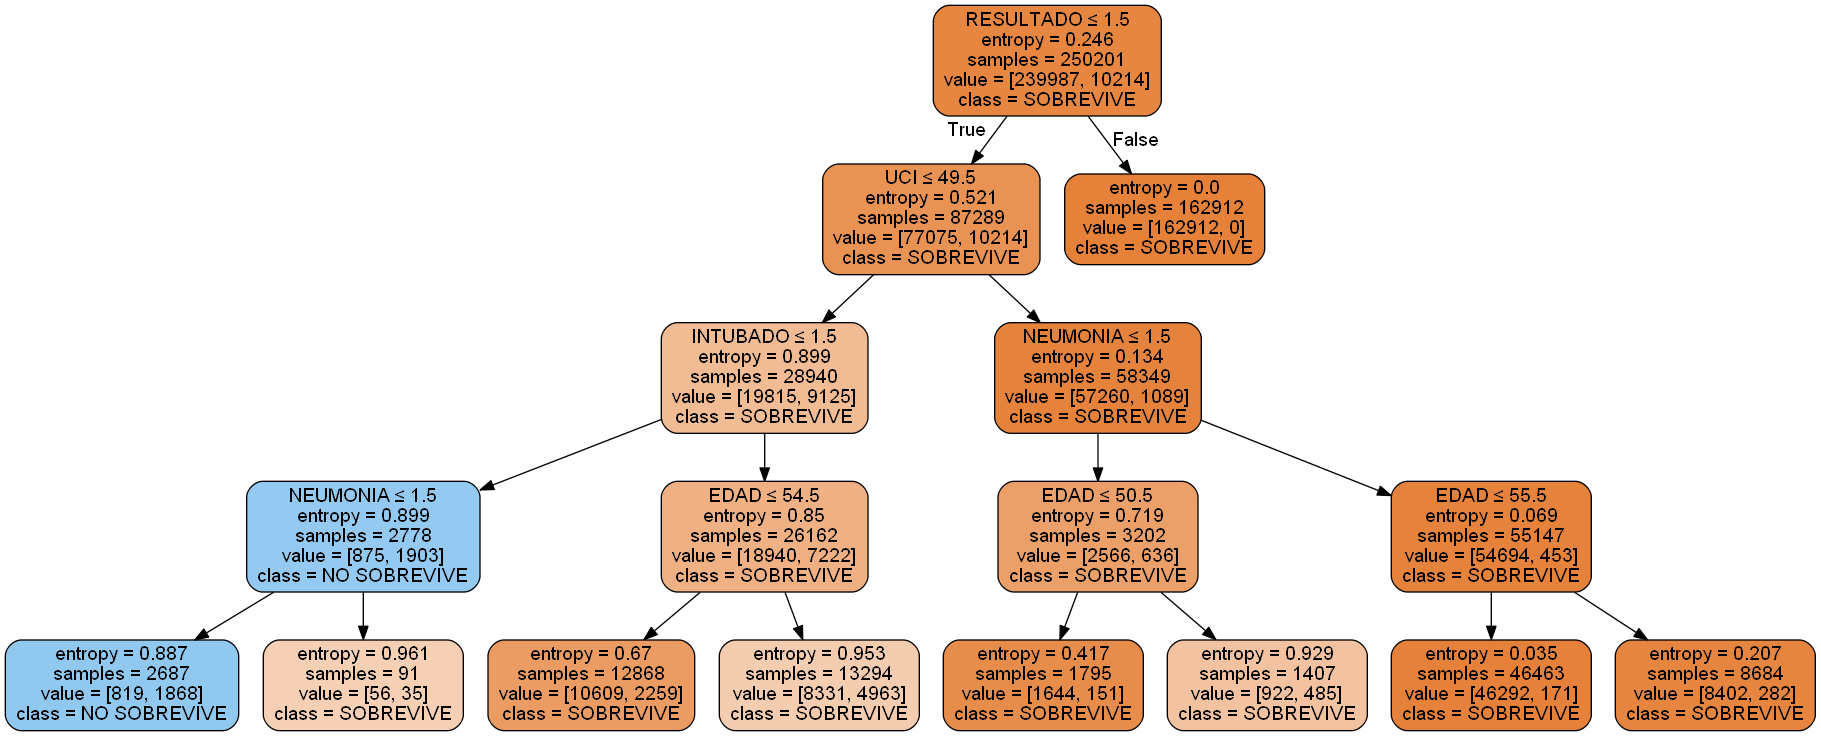

In [72]:
dot_data = tree.export_graphviz(clf_train, out_file=None,
                                feature_names=predictors,
                                class_names= clasif,
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("COVID-MX-color",format="png") 

from IPython.display import Image

fig = Image(filename=('COVID-MX-color.png'))
fig

In [73]:
"""
predictors = ['SEXO',  'INTUBADO', 'NEUMONIA', 'EDAD', 'DIABETES', 'EPOC', 'ASMA', 
           'INMUSUPR', 'HIPERTENSION',  'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA',
           'TABAQUISMO', 'RESULTADO', 'UCI']
"""

# Verificar las variables predictoras que tienen mas peso en el modelo
clf_train.feature_importances_

array([0.        , 0.03985685, 0.05400317, 0.04810934, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.35952114, 0.4985095 ])

# Parte 2: Aplicar el modelo del árbol de decisiones

1. Usaremos los resultados del modelo del árbol de decisiones programado para
**etiquetar un conjunto de datos de pacientes con COVID-19**. 
2. El árbol de decisiones evaluará las características de cada observación y etiquetará la observación como sobreviviente (etiqueta = 1) o víctima fatal (etiqueta = 2).

### a) Crear un arreglo de variables de entrada a partir del conjunto de datos de prueba

Anteriormente se genero un dataset de prueba con el 30% de os datos del dataset original


### Aplicar el modelo al conjunto de datos de prueba

1. Utilizar el **método predict()** del objeto **clf_train** que se **entrenó para etiquetar** las observaciones en el conjunto de datos de prueba con **la clasificación de supervivencia más probable.**
2. Considere el arreglo de variables de entrada del conjunto de datos de prueba como el parámetro para este método

**Aplicar el modelo** a los **datos de prueba** y almacenar el resultado en un **dataframe** de pandas

Utiliar  **X_input** como el argumento para el **método predict()** de la clase **clf_train** del object **classifier** 

In [74]:
predicciones = clf_train.predict(test[predictors])

# convierte la matriz de destino en un dataframe de pandas usando el método
# pd.DataFrame () 

predicciones = pd.DataFrame({'Prediccion':predicciones, 'ID':test['ID']})

In [75]:
predicciones.head(10)

,Prediccion,ID
0,1,0
1,1,1
3,1,3
5,1,5
6,1,6
9,1,9
10,1,10
12,1,12
26,1,26
27,1,27


In [76]:
# Combinamos el dataset de la prediccion con el dataset original haciendo un join
# con la columna ID
testing_results = pd.merge(predicciones, df_general[['ID','SOBREVIVIO']], on=['ID'])

In [77]:
# Mostramos 20 observaciones para ver la estimacion o prediccion con respecto al valor original
testing_results.head(20)

,Prediccion,ID,SOBREVIVIO
0,1,0,2
1,1,1,1
2,1,3,2
3,1,5,1
4,1,6,1
5,1,9,1
6,1,10,1
7,1,12,1
8,1,26,1
9,1,27,1


In [78]:
# Calculamos la precisión como una relación de observaciones coincidentes a las 
# observaciones totales. Almacenar esto en la variable coincidencias.
coincidencias = np.sum(testing_results['Prediccion'] == testing_results['SOBREVIVIO']) / float(len(testing_results))

In [79]:
# Mostramos el porcentaje de coincidencias
coincidencias

0.9627622737567147

In [80]:
# puntúar el modelo en los dos conjuntos de datos y almacenar los puntajes en variables.   
# Convertir los scores a strings para impresion

train_score = str(clf_train.score(train[predictors], train['SOBREVIVIO']))
test_score = str(clf_train.score(test[predictors], test['SOBREVIVIO']))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.963369450961427 Testing score = 0.9627622737567147


## Diagramas de frecuencias variables categoricas

https://www.youtube.com/watch?v=NpEPEIMvItw&fbclid=IwAR2w2IU-4RmhPbYjFhmIrRm1gAQJg94VTQy5QLKqtE9x5V37J7cEbLxx-rg 

In [ ]:
['ID', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES', 'TIPO_PACIENTE', 
 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD',
 'NACIONALIDAD', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_CON',
 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 
 'RESULTADO', 'UCI']

In [95]:
sector = pd.DataFrame( pd.value_counts(df_general['SECTOR']) )
sector = pd.DataFrame( pd.value_counts(df_general['SECTOR']) )
sector = pd.DataFrame( pd.value_counts(df_general['SECTOR']) )
sector = pd.DataFrame( pd.value_counts(df_general['SECTOR']) )
sector = pd.DataFrame( pd.value_counts(df_general['SECTOR']) )
sector = pd.DataFrame( pd.value_counts(df_general['SECTOR']) )
sector = pd.DataFrame( pd.value_counts(df_general['SECTOR']) )
sector = pd.DataFrame( pd.value_counts(df_general['SECTOR']) )

In [96]:
sector

,SECTOR
12,211367
4,99300
6,13921
9,13836
3,7292
8,3661
11,2800
99,2075
10,1927
7,371


### Referencias
* Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.
* Russell, S. J., & Norvig, P. (2004). Inteligencia Artificial: un enfoque moderno (No. 04; Q335, R8y 2004.).